<a href="https://colab.research.google.com/github/Rafiprabowo/Pengolahan-Citra-dan-Visi-Komputer/blob/main/20_Muhamad_Rafi_Prabowo_Morfologi_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jobsheet Pertemuan 9 Pengolahan Citra dan Visi Komputer
## Nama : Muhamad Rafi Prabowo
## NIM : 2141720239
## Kelas : 3D
## No Absen : 20

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Library


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Membuat fungsi dilasi serta menampilkan hasil dilasi dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari *openCV*

## Tanpa library

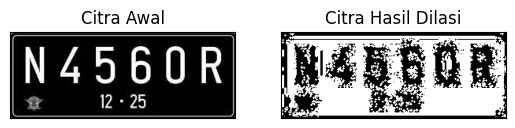

In [57]:
def dilasi(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center_x, k_center_y = k_width // 2, k_height // 2
    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(k_center_y, height - k_center_y):
        for x in range(k_center_x, width - k_center_x):
            dilated = False
            for ky in range(-k_center_y, k_center_y + 1):
                for kx in range(-k_center_x, k_center_x + 1):
                    img_y = y + ky
                    img_x = x + kx
                    if kernel[ky + k_center_y, kx + k_center_x] == 1 and image[img_y, img_x] == 1:
                        dilated = True
                        break
                if dilated:
                    break
            if dilated:
                result[y, x] = 1

    return result

image = cv2.imread('plat nomer.jpg',0)
kernel = np.array([[0, 1, 0,],
                   [1, 1, 1],
                   [0, 1, 0]])
dilated_image = dilasi(image, kernel)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dilated_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.xticks([]), plt.yticks([])
plt.show()


## Menggunakan Library

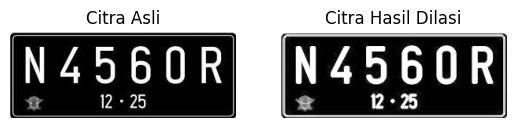

In [40]:
from google.colab.patches import cv2_imshow
image = cv2.imread('plat nomer.jpg', 0)
ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.array([[0, 1, 0],
                  [1, 1, 1],
                  [0, 1, 0]],np.uint8)

dilated_image = cv2.dilate(image, kernel, iterations=1)

plt.subplot(121), plt.imshow(image, cmap = 'gray')
plt.title('Citra Asli'), plt.axis('off')
plt.subplot(122), plt.imshow(dilated_image, cmap = 'gray')
plt.title('Citra Hasil Dilasi'), plt.axis('off')
plt.show()


# Buatlah Fungsi Erosi dengan Structuring Element Erosi (SE) berbentuk square 5x5 tanpa library morphology dari openCV

## Tanpa library

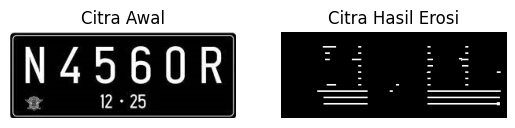

In [55]:
def erosi(image, kernel):
    height, width = image.shape
    k_height, k_width = kernel.shape
    k_center_x, k_center_y = k_width // 2, k_height // 2
    result = np.zeros((height, width), dtype=np.uint8)

    for y in range(k_center_y, height - k_center_y):
        for x in range(k_center_x, width - k_center_x):
            eroded = True
            for ky in range(-k_center_y, k_center_y + 1):
                for kx in range(-k_center_x, k_center_x + 1):
                    img_y = y + ky
                    img_x = x + kx
                    if kernel[ky + k_center_y, kx + k_center_x] == 1 and image[img_y, img_x] != 1:
                        eroded = False
                        break
                if not eroded:
                    break
            if eroded:
                result[y, x] = 1

    return result


image = cv2.imread('plat nomer.jpg',0)
# Kernel square 5x5
kernel = np.ones((5, 5), dtype=np.uint8)

eroded_image = erosi(image, kernel)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Awal'), plt.axis('off')
plt.subplot(122), plt.imshow(eroded_image,cmap = 'gray')
plt.title('Citra Hasil Erosi'), plt.axis('off')
plt.show()


## Menggunakan Library

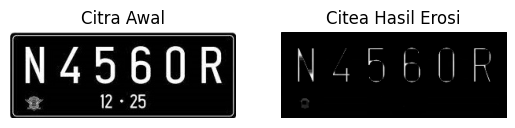

In [52]:
image = cv2.imread('plat nomer.jpg', 0)
kernel = np.ones((5,5), np.uint8)
eroded_image = cv2.erode(image, kernel, iterations=1)
plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('Citra Awal'), plt.axis('off')
plt.subplot(122), plt.imshow(eroded_image, cmap='gray')
plt.title('Citea Hasil Erosi'), plt.axis('off')
plt.show()

# Implementasi operasi opening dengan Stucturing Element berbentuk square 3 x3

##  Tanpa menggunakan library morphology

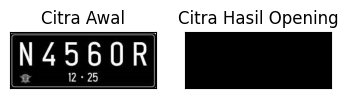

In [58]:
img_o= cv2.imread('plat nomer.jpg',0)
reto, thresho = cv2.threshold(img_o, 127, 225,cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
imgO = dilasi(erosi(thresho,kernel),kernel)
plt.subplot(131),plt.imshow(img_o,cmap = 'gray')
plt.title('Citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(imgO,cmap = 'gray')
plt.title('Citra Hasil Opening'), plt.xticks([]), plt.yticks([])
plt.show()

## Menggunakan Library Morphology

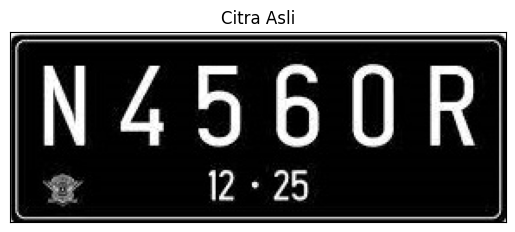

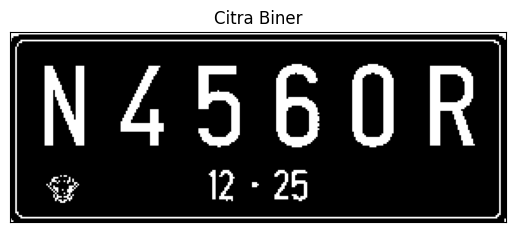

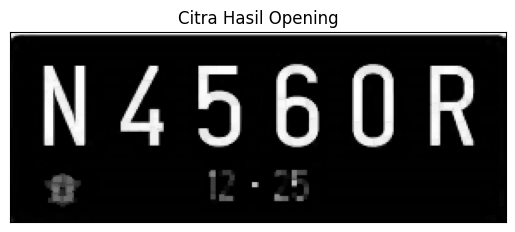

In [64]:
image = cv2.imread('plat nomer.jpg', 0)
ret, thresh = cv2.threshold(image, 127, 225, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)

plt.imshow(image, cmap = 'gray')
plt.title('Citra Asli'),  plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(thresh, cmap = 'gray')
plt.title('Citra Biner'),  plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel), cmap = 'gray')
plt.title('Citra Hasil Opening'),  plt.xticks([]), plt.yticks([])
plt.show()

# Implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3

## Tanpa Library

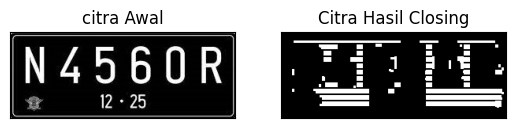

In [66]:
def closing(image, kernel):
    # Erosi diikuti oleh dilasi
    eroded_image = erosi(image, kernel)
    closed_image = dilasi(eroded_image, kernel)
    return closed_image

image = cv2.imread('plat nomer.jpg', 0)
kernel = np.ones((3,3), np.uint8)

closed_image = closing(image, kernel)

plt.subplot(121), plt.imshow(image, cmap='gray')
plt.title('citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(closed_image, cmap= 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()

## Menggunakan Library

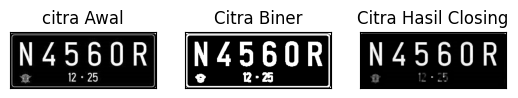

In [69]:
image = cv2.imread('plat nomer.jpg', 0)
ret, thrash = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
kernel = np.ones((3,3), np.uint8)
biner_erosion = cv2.erode(thrash, kernel, iterations=1)
biner_dilation = cv2.dilate(thrash, kernel, iterations=1)
biner_closing = biner_dilation
erosion = cv2.erode(image, kernel, iterations=1)
dilation = cv2.dilate(erosion, kernel, iterations=1)
closing = dilation

plt.subplot(131), plt.imshow(image, cmap='gray')
plt.title('citra Awal'), plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(biner_dilation, cmap = 'gray')
plt.title('Citra Biner'), plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(closing, cmap= 'gray')
plt.title('Citra Hasil Closing'), plt.xticks([]), plt.yticks([])
plt.show()
